In [1]:
import unibox as ub
import gradio as gr

In [2]:
# Install ipyevents if not already installed
# !pip install ipyevents

from IPython.display import display
import ipywidgets as widgets
from ipyevents import Event
from PIL import Image as PILImage
from io import BytesIO
from unibox import concurrent_loads

def gallery_with_click_selection(paths: list[str], labels: list[str] = [],
                                 row_height='150px', num_workers=32, debug_print=True, thumbnail_size: int = 512):
    """Displays images in a gallery where images can be selected by clicking, with an export button.

    Parameters
    ----------
    paths: list of str
        Paths to images to display. Can be local paths, URLs, or S3 paths.
    labels: list of str
        Labels for each image. Defaults to the filename if not provided.
    row_height: str
        CSS height value to assign to all images.
    num_workers: int
        Number of concurrent workers to load images.
    debug_print: bool
        Whether to print debug information or not.
    thumbnail_size: int
        If provided, resize images to this size using PIL's thumbnail method.
    """
    if len(paths) > 1000:
        raise ValueError("Too many images to display.")

    if len(labels) > 0 and len(labels) != len(paths):
        raise ValueError("Number of labels must match number of paths.")

    images = concurrent_loads(paths, num_workers=num_workers, debug_print=debug_print)

    image_widgets = []
    selected_indices = set()

    for i, image in enumerate(images):
        try:
            if thumbnail_size > 0:
                image.thumbnail((thumbnail_size, thumbnail_size))

            # Ensure image is in RGB mode for saving as JPEG
            if image.mode in ('RGBA', 'P'):
                image = image.convert('RGB')

            buffered = BytesIO()
            image.save(buffered, format="JPEG")
            img_data = buffered.getvalue()

            # Create an Image widget
            img_widget = widgets.Image(value=img_data, format='jpeg',
                                       layout=widgets.Layout(height=row_height, width='auto',
                                                             border='2px solid transparent'))

            # Attach click event to image
            def on_click(event, img_widget=img_widget, idx=i):
                if idx in selected_indices:
                    selected_indices.remove(idx)
                    img_widget.layout.border = '2px solid transparent'
                else:
                    selected_indices.add(idx)
                    img_widget.layout.border = '4px solid blue'

            event_handler = Event(source=img_widget, watched_events=['click'])
            event_handler.on_dom_event(on_click)

            # Create label
            if len(labels) > 0:
                caption_str = labels[i]
            else:
                caption_str = paths[i].split("/")[-1]
            label_widget = widgets.Label(value=caption_str, layout=widgets.Layout(width='auto'))

            # Combine into a VBox
            vbox = widgets.VBox([img_widget, label_widget],
                                layout=widgets.Layout(align_items='center', width='200px'))

            image_widgets.append(vbox)

        except Exception as e:
            # Handle exceptions
            error_label = widgets.Label(value=f'Error loading {paths[i]}: {e}', color='red')
            image_widgets.append(widgets.VBox([error_label]))

    # Arrange images in a GridBox
    grid = widgets.GridBox(image_widgets,
                           layout=widgets.Layout(grid_template_columns="repeat(auto-fill, minmax(200px, 1fr))",
                                                 grid_gap='10px'))

    # Create an export button
    export_button = widgets.Button(description='Export', button_style='success')
    output = widgets.Output()

    # Define the event handler for the export button
    def on_export_clicked(b):
        with output:
            output.clear_output()
            print("Selected indices:", sorted(selected_indices))

    export_button.on_click(on_export_clicked)

    # Display the gallery and the export button
    display(widgets.VBox([grid, export_button, output]))


In [4]:
uris = ["https://cdn.donmai.us/180x180/8e/ea/8eea944690c0c0b27e303420cb1e65bd.jpg"] * 9
labels = ['Image 1', 'Image 2', 'Image 3'] * 3
gallery_with_click_selection(uris, labels)

Loading batches:   0%|          | 0/9 [00:00<?, ?it/s]

2024-11-17 10:24:39,142 [INFO] UniLogger: UniLoader.loads: .jpg LOADED from "/tmp/tmp4y9uz5r6.jpg" in 0.00s
2024-11-17 10:24:39,330 [INFO] UniLogger: UniLoader.loads: .jpg LOADED from "/tmp/tmpqa6luiol.jpg" in 0.00s
2024-11-17 10:24:39,608 [INFO] UniLogger: UniLoader.loads: .jpg LOADED from "/tmp/tmpsbw_w78c.jpg" in 0.00s
2024-11-17 10:24:39,844 [INFO] UniLogger: UniLoader.loads: .jpg LOADED from "/tmp/tmpz1jm9ozo.jpg" in 0.00s
2024-11-17 10:24:39,920 [INFO] UniLogger: UniLoader.loads: .jpg LOADED from "/tmp/tmp9h1yg74d.jpg" in 0.00s
2024-11-17 10:24:40,026 [INFO] UniLogger: UniLoader.loads: .jpg LOADED from "/tmp/tmpv36rd6qt.jpg" in 0.00s
2024-11-17 10:24:40,801 [INFO] UniLogger: UniLoader.loads: .jpg LOADED from "/tmp/tmpr95f14kd.jpg" in 0.00s
2024-11-17 10:24:40,955 [INFO] UniLogger: UniLoader.loads: .jpg LOADED from "/tmp/tmpyvoesde8.jpg" in 0.00s
2024-11-17 10:24:41,016 [INFO] UniLogger: UniLoader.loads: .jpg LOADED from "/tmp/tmpdklwocyt.jpg" in 0.00s



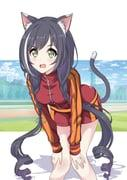
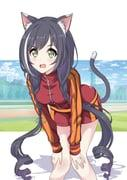
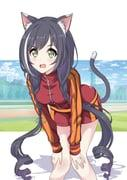
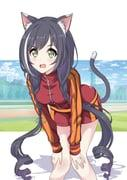
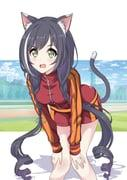
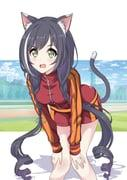
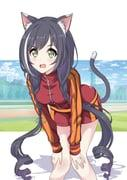
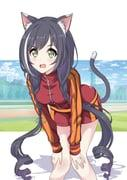
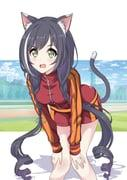

In [8]:
from IPython.display import HTML, display
from PIL import Image as PILImage
from io import BytesIO
import base64

def gallery_with_js_selection(paths: list[str], labels: list[str] = [], 
                              row_height='150px', num_workers=32, debug_print=True, thumbnail_size: int = 512):
    """Displays images in a gallery with JavaScript-based selection.

    Parameters
    ----------
    paths: list of str
        Paths to images to display. Can be local paths or URLs.
    labels: list of str
        Labels for each image. Defaults to the filename if not provided.
    row_height: str
        CSS height value to assign to all images.
    num_workers: int
        Number of concurrent workers to load images.
    debug_print: bool
        Whether to print debug information or not.
    thumbnail_size: int
        If provided, resize images to this size using PIL's thumbnail method.
    """
    if len(paths) > 1000:
        raise ValueError("Too many images to display.")

    if len(labels) > 0 and len(labels) != len(paths):
        raise ValueError("Number of labels must match number of paths.")

    images = ub.concurrent_loads(paths, num_workers=num_workers, debug_print=debug_print) # list of PIL images
    for img in images:
        # do thumbnail or handle empty (failed to load ones will be None)

    # exports to a text version of python list of the selected indices
    
    figures = []
    for i, image in enumerate(images):
        if image is not None:
            try:
                buffered = BytesIO()
                image.save(buffered, format="JPEG")
                img_data = base64.b64encode(buffered.getvalue()).decode()
                src = f"data:image/jpeg;base64,{img_data}"

                if len(labels) > 0:
                    caption_str = labels[i]
                else:
                    caption_str = paths[i].split("/")[-1]

                figures.append(f'''
                    <figure style="margin: 5px !important;">
                      <img src="{src}" style="height: {row_height}; cursor: pointer;" onclick="selectImage({i}, this)">
                      <figcaption style="font-size: 0.6em">{caption_str}</figcaption>
                    </figure>
                ''')
            except Exception as e:
                figures.append(f'''
                    <figure style="margin: 5px !important;">
                      <figcaption style="font-size: 0.6em; color: red;">Error processing image {i}: {e}</figcaption>
                    </figure>
                ''')
        else:
            figures.append(f'''
                <figure style="margin: 5px !important;">
                  <figcaption style="font-size: 0.6em; color: red;">Error loading image {i}</figcaption>
                </figure>
            ''')

    html_content = f'''
    <div id="gallery" style="display: flex; flex-wrap: wrap; text-align: center;">
    {''.join(figures)}
    </div>
    <button onclick="exportSelection()" style="margin-top: 10px;">Export</button>
    <div id="output" style="margin-top: 10px; font-weight: bold;"></div>

    <script>
    var selectedIndices = [];

    function selectImage(index, imgElement) {{
        var idx = selectedIndices.indexOf(index);
        if (idx > -1) {{
            // Deselect
            selectedIndices.splice(idx, 1);
            imgElement.style.border = '';
        }} else {{
            // Select
            selectedIndices.push(index);
            imgElement.style.border = '4px solid blue';
        }}
    }}

    function exportSelection() {{
        var outputDiv = document.getElementById('output');
        if (selectedIndices.length > 0) {{
            outputDiv.innerHTML = 'Selected indices: ' + selectedIndices.sort((a, b) => a - b).join(', ');
        }} else {{
            outputDiv.innerHTML = 'No images selected.';
        }}
    }}
    </script>
    '''

    display(HTML(html_content))

gallery_with_js_selection(uris, labels)

Loading batches:   0%|          | 0/9 [00:00<?, ?it/s]


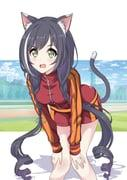
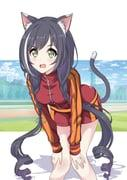
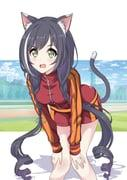
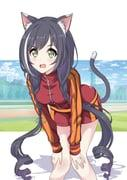
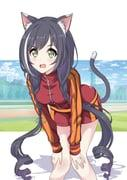
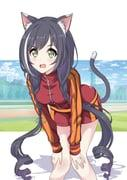
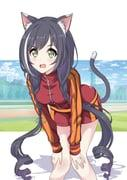
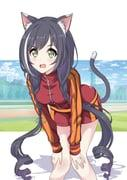
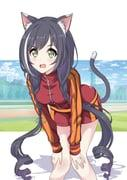

In [1]:
import unibox as ub

uris = ["https://cdn.donmai.us/180x180/8e/ea/8eea944690c0c0b27e303420cb1e65bd.jpg"] * 9
labels = ['Image 1', 'Image 2', 'Image 3'] * 3
ub.label_gallery(uris, labels)